In [1]:
import glob
from datetime import datetime
from functools import reduce
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [7]:
files = glob.glob('../Documents/trafficdata/2020/d11/d11_text_station_5min_2020*.txt.gz')


In [9]:
traffic = pd.read_csv(files[0], header=None)
traffic

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,10/22/2020 00:00:00,1100313,11,5,N,FR,NaN,10,100,5.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,10/22/2020 00:00:00,1100323,11,5,N,FR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,10/22/2020 00:00:00,1100326,11,5,N,FR,NaN,18,100,2.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,10/22/2020 00:00:00,1100330,11,5,N,FR,NaN,20,100,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,10/22/2020 00:00:00,1100340,11,5,N,FR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396859,10/22/2020 23:55:00,1127146,11,94,E,FR,NaN,10,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
396860,10/22/2020 23:55:00,1127151,11,5,N,OR,NaN,10,100,3.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
396861,10/22/2020 23:55:00,1127164,11,163,N,ML,0.656,40,100,30.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
396862,10/22/2020 23:55:00,1127191,11,52,E,FR,NaN,10,100,2.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [10]:
traffic = pd.DataFrame()
for f in files:
    #data = pd.read_csv(f, header=None)
    data = pd.read_csv(f, header=None, usecols=[0,9,11], names=['RecordDate','TotalFlow','Speed'])
    traffic = traffic.append(data)

In [11]:
traffic

,RecordDate,TotalFlow,Speed
0,10/22/2020 00:00:00,5.0,NaN
1,10/22/2020 00:00:00,NaN,NaN
2,10/22/2020 00:00:00,2.0,NaN
3,10/22/2020 00:00:00,0.0,NaN
4,10/22/2020 00:00:00,NaN,NaN
...,...,...,...
434011,08/21/2020 23:55:00,56.0,67.2
434012,08/21/2020 23:55:00,1.0,NaN
434013,08/21/2020 23:55:00,2.0,NaN
434014,08/21/2020 23:55:00,8.0,NaN


In [12]:
traffic['RecordDate'] = pd.to_datetime(traffic['RecordDate'])

In [13]:
traffic['Month'] = pd.DatetimeIndex(traffic['RecordDate']).month

In [14]:
import calendar
traffic['Month'] = traffic['Month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
traffic['Time'] = traffic['RecordDate'].dt.time

In [16]:
AvgVehicleCount = traffic.groupby(['Month','Time'])['TotalFlow'].mean().reset_index()

In [17]:
AvgVehicleCount.columns = ['Month','Time','AvgVehicleCount']

In [18]:
AvgVehicleSpeed = traffic.groupby(['Month','Time'])['Speed'].mean().reset_index()

In [19]:
AvgVehicleSpeed.columns = ['Month','Time','average']

In [20]:
AvgVehicleSpeed

,Month,Time,average
0,Apr,00:00:00,67.776179
1,Apr,00:05:00,67.629094
2,Apr,00:10:00,67.584071
3,Apr,00:15:00,67.573579
4,Apr,00:20:00,67.525856
...,...,...,...
3451,Sep,23:35:00,67.518378
3452,Sep,23:40:00,67.569811
3453,Sep,23:45:00,67.575139
3454,Sep,23:50:00,67.565660


In [240]:
AvgVehicleCount.to_csv('AvgVehicleCount.csv', index = False)

In [241]:
AvgVehicleSpeed.to_csv('AvgVehicleSpeed.csv', index = False)

In [278]:
AvgVehicleCount = pd.read_csv('AvgVehicleCount.csv', header=None)

In [400]:
AvgVehicleCount[0].unique()

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [ ]:
AvgVehicleCount = AvgVehicleCount.reset_index(drop=True)

In [344]:
AvgVehicleCount[2] = pd.to_numeric(AvgVehicleCount[2])

In [421]:
AvgVehicleCount_tr = AvgVehicleCount[~AvgVehicleCount[0].isin(['Oct','Nov','Dec'])] #AvgVehicleCount[AvgVehicleCount[0] != ('Oct','Nov','Dec')]

In [413]:
AvgVehicleCount_ts = AvgVehicleCount[AvgVehicleCount[0].isin(['Oct','Nov','Dec'])] 

In [422]:
AvgVehicleCount_tr

,0,1,2
0,Apr,00:00:00,18.786846
1,Apr,00:05:00,18.998019
2,Apr,00:10:00,19.309337
3,Apr,00:15:00,18.709494
4,Apr,00:20:00,17.395618
...,...,...,...
3451,Sep,23:35:00,44.858541
3452,Sep,23:40:00,44.992641
3453,Sep,23:45:00,43.196685
3454,Sep,23:50:00,40.329086


In [423]:
def get_list(x, m):
    return list(zip(*(x[i:] for i in range(m))))

In [424]:
def get_data(input_df,lag):
    dft = input_df
    print(dft.shape)
    w = lag
    x = []
    print(dft.shape[0])
    #for i in range(dft.shape[0]):
    x = (get_list(dft, w+1))

    x = np.array(x)

    y = torch.tensor(x[:, -1])
    x = torch.tensor(x[:, :-1])
    return x, y

In [425]:
x_train = torch.empty((AvgVehicleCount_tr.shape[0]), 5)
y_train = torch.empty((AvgVehicleCount_tr.shape[0]))

In [426]:
x_train, y_train = get_data(AvgVehicleCount_tr[2],5)

(2592,)
2592


In [427]:
print(y_train.shape)

torch.Size([2587])


In [428]:
l=5

In [429]:
class AutoRegressive(nn.Module):
    def __init__(self, p):
        # Input the AR parameters
        # Building only for linear data for now
        super(AutoRegressive, self).__init__()
        assert type(p) == int
        assert p >= 0
        
        # Initialize Auto Regressive parameter
        self.p = p
        
        # Linear auto-regressive parameters.
#         self.param_list = nn.ModuleList([nn.Linear(1, 1, bias=False) for i in range(p-1)])
        
        self.linear = nn.Linear(self.p, 1, bias=True).double()
         
        # ETA e(t) for noise , which is last layer dependent
#         self.param_list.append(nn.Linear(1, 1, bias=True))
        
        # One Learnable parameter for constant c
#         self.c = nn.Parameter(torch.tensor(np.random.randn(), requires_grad=True))
        
    def forward(self, x):
        # Input data example
        # Verify shape of tensor to have length (1,p) or something.
        assert x.shape[1] == self.p
        
#         y = self.linear(x)
        
#         for i in range(self.p):
#             print(self.param_list[i].features)
#             y += x[:, i] * self.param_list[i]
        
#         simple_sum = reduce(lambda x,y: x + y, [self.param_list[i](x[i]) for i in range(self.p)])
        
        return self.linear(x).flatten() #+ self.c

In [430]:
net2 = AutoRegressive(l)

In [431]:
optimizer = torch.optim.RMSprop(net2.parameters(), lr=0.001)
criterion = torch.nn.MSELoss(reduction='mean')

In [432]:
train_loader = DataLoader(
    TensorDataset(x_train, y_train), batch_size=3, shuffle=True
)

In [433]:
for e in range(10):
    loss_total = 0
    for xi, yi in tqdm(train_loader):
        xi, yi = xi.to('cpu'), yi.to('cpu')
        optimizer.zero_grad()
        prediction = net2(xi)
        loss = criterion(yi, prediction)
        loss.backward(retain_graph=True)
        optimizer.step()
        loss_total += loss
        
    print(e, loss_total / len(y_train))

 24%|██▍       | 210/863 [00:00<00:00, 2098.40it/s]

0 tensor(1507.1130, dtype=torch.float64, grad_fn=<DivBackward0>)


 25%|██▌       | 218/863 [00:00<00:00, 2177.80it/s]

1 tensor(13.6137, dtype=torch.float64, grad_fn=<DivBackward0>)


 24%|██▍       | 207/863 [00:00<00:00, 2063.56it/s]

2 tensor(11.8845, dtype=torch.float64, grad_fn=<DivBackward0>)


 26%|██▌       | 221/863 [00:00<00:00, 2206.03it/s]

3 tensor(10.5346, dtype=torch.float64, grad_fn=<DivBackward0>)


 25%|██▍       | 214/863 [00:00<00:00, 2134.05it/s]

4 tensor(9.4674, dtype=torch.float64, grad_fn=<DivBackward0>)


 25%|██▍       | 212/863 [00:00<00:00, 2112.56it/s]

5 tensor(8.3925, dtype=torch.float64, grad_fn=<DivBackward0>)


 25%|██▍       | 214/863 [00:00<00:00, 2138.34it/s]

6 tensor(7.5790, dtype=torch.float64, grad_fn=<DivBackward0>)


 23%|██▎       | 202/863 [00:00<00:00, 2013.48it/s]

7 tensor(6.8933, dtype=torch.float64, grad_fn=<DivBackward0>)


 17%|█▋        | 147/863 [00:00<00:00, 1466.41it/s]

8 tensor(6.4367, dtype=torch.float64, grad_fn=<DivBackward0>)


100%|██████████| 863/863 [00:00<00:00, 1829.95it/s]

9 tensor(5.9858, dtype=torch.float64, grad_fn=<DivBackward0>)


In [434]:
x_test = torch.empty((AvgVehicleCount_ts.shape[0]), 5)
y_test = torch.empty((AvgVehicleCount_ts.shape[0]))

In [435]:
x_test, y_test = get_data(AvgVehicleCount_ts[2],5)

(864,)
864


In [436]:
test_loader = DataLoader(
    TensorDataset(x_test, y_test), batch_size=3, shuffle=True
)

In [437]:
for e in range(10):
    loss_total = 0
    for xi, yi in tqdm(test_loader):
        xi, yi = xi.to('cpu'), yi.to('cpu')
        optimizer.zero_grad()
        prediction = net2(xi)
        loss = criterion(yi, prediction)
        loss.backward(retain_graph=True)
        optimizer.step()
        loss_total += loss
        
    print(e, loss_total / len(y_test))

  0%|          | 0/287 [00:00<?, ?it/s]

0 tensor(6.6406, dtype=torch.float64, grad_fn=<DivBackward0>)
1 tensor(6.5548, dtype=torch.float64, grad_fn=<DivBackward0>)


  0%|          | 0/287 [00:00<?, ?it/s]

2 tensor(6.3947, dtype=torch.float64, grad_fn=<DivBackward0>)
3 tensor(6.2272, dtype=torch.float64, grad_fn=<DivBackward0>)


  0%|          | 0/287 [00:00<?, ?it/s]

4 tensor(6.1948, dtype=torch.float64, grad_fn=<DivBackward0>)
5 tensor(6.1197, dtype=torch.float64, grad_fn=<DivBackward0>)


  0%|          | 0/287 [00:00<?, ?it/s]

6 tensor(6.0322, dtype=torch.float64, grad_fn=<DivBackward0>)
7 tensor(5.8381, dtype=torch.float64, grad_fn=<DivBackward0>)


100%|██████████| 287/287 [00:00<00:00, 2167.92it/s]

8 tensor(5.8581, dtype=torch.float64, grad_fn=<DivBackward0>)
9 tensor(5.6749, dtype=torch.float64, grad_fn=<DivBackward0>)


In [ ]:
c = 'San Diego'
cases = df[df.Admin2 == c].values[0][11:]
cases = np.array([0] + [cases[i]-cases[i-1] for i in range(1, len(cases))])
#print(cases)
casespred = df[df.Admin2 == c].values[0][mt.floor((df.shape[1])*0.8)+11:]
casespred = np.array([0] + [casespred[i]-casespred[i-1] for i in range(1, len(casespred))])
pred = np.zeros_like(casespred)
print(len(casespred))
for i in range(5,len(casespred)):
    pred[i] = net2(torch.tensor(casespred[i-5:i]).view(1, 5).double())

In [498]:
AvgVehicleCount[2] = pd.to_numeric(AvgVehicleCount[2])
ActualCount = AvgVehicleCount[AvgVehicleCount[0] =='Dec'].reset_index(drop=True)
ActualCount = ActualCount[2]
AvgVehicleCount_ts[2] = pd.to_numeric(AvgVehicleCount_ts[2])
casespred = AvgVehicleCount_ts[AvgVehicleCount_ts[0] =='Dec'].reset_index(drop=True)
cases = casespred[2]
testpred = np.zeros_like(cases)
cases = np.array(cases)
for i in range(5,len(cases)):
    testpred[i] = net2(torch.tensor(cases[i-5:i]).view(1, 5).double())
 

/Users/aparnagupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


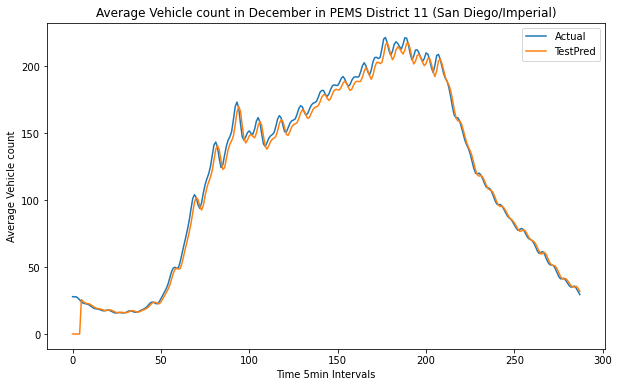

In [501]:
plt.figure(figsize=(10, 6))
plt.plot(ActualCount)
plt.plot(testpred)
plt.xlabel('Time 5min Intervals')
plt.ylabel('Average Vehicle count')
plt.legend(['Actual', 'TestPred'])
plt.title(f'Average Vehicle count in December in PEMS District 11 (San Diego/Imperial)')
plt.savefig('San Diego test traffic_vehcount Prediction', bbox_inches='tight')